In [1]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style('whitegrid')

sys.path.append("../")
from utility.mixture_normal import MixtureNormal

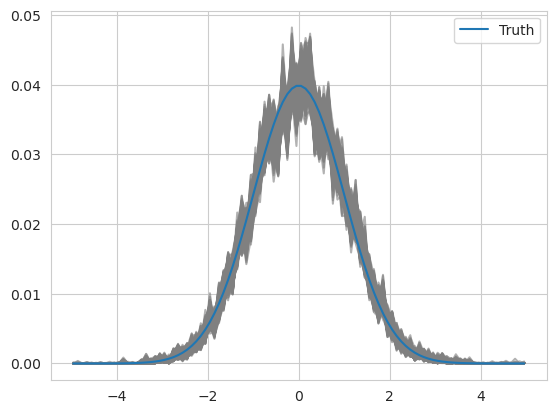

In [75]:
k = 100
xs = np.random.normal(loc=0, scale=1, size=10000)
cnts, intervals = np.histogram(xs, bins=k, range=(-5, 5))
mid_points = (intervals[:-1] + intervals[1:]) / 2

# setting up grids
a = np.ones(shape=k) / k # prior uniform
a_post = a + cnts # dirichilet posterior 

# plotting dirichlet histogram
samples = np.random.dirichlet(a_post, size=1000)
_ = plt.plot(mid_points, samples.T, color='grey', alpha=0.6)

truth = stats.norm(loc=0, scale=1).pdf(mid_points)
_ = plt.plot(mid_points, truth/truth.sum(), label='Truth')

plt.legend(loc='best')
plt.show()

If we have two random variables with unknow distirbution. We can use Dirichlet process to estimate the distribution in a grid. The Dircihlet samples can serve as a proxy to uncertainty.

The differences between the two variables can be measured by using Kullback-Leibler Divergence.

In [86]:
def kl_divergence(ps, qs):
    """Kullback-Leibler Divergence evaluated as KL(p||q)"""
    return -(ps * np.log(qs / ps)).sum()

In [93]:
xs1 = np.random.normal(loc=0, scale=2, size=10000)
xs2 = np.random.normal(loc=1, scale=1.25, size=10000)

k = 100
cnts1, intervals = np.histogram(xs1, bins=k, range=(-6, 6))
cnts2, _ = np.histogram(xs2, bins=k, range=(-6, 6))
mid_points = (intervals[:-1] + intervals[1:]) / 2

# setting up grids
a = np.ones(shape=k) / k # prior uniform
a1_post = a + cnts1 # posteriors
a2_post = a + cnts2 # posteriors

<AxesSubplot: ylabel='Density'>

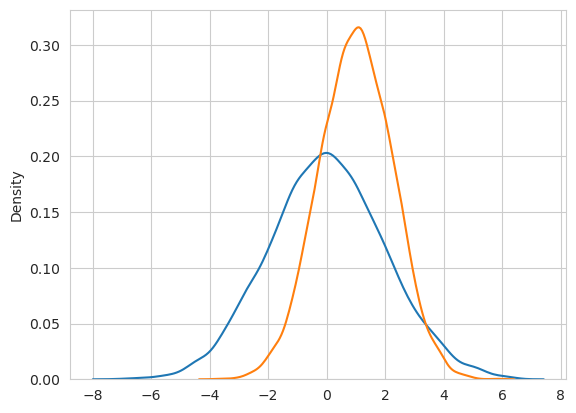

In [88]:
sns.kdeplot(xs1)
sns.kdeplot(xs2)

In [94]:
samples1 = np.random.dirichlet(a1_post, size=1000)
samples2 = np.random.dirichlet(a2_post, size=1000)

In [105]:
kls = []
for i in range(1000):
    kl = kl_divergence(samples1[i], samples2[i])
    if not np.isnan(kl): kls.append(kl)

/tmp/ipykernel_20234/2519665579.py:3: RuntimeWarning: divide by zero encountered in log
  return -(ps * np.log(qs / ps)).sum()
/tmp/ipykernel_20234/2519665579.py:3: RuntimeWarning: divide by zero encountered in divide
  return -(ps * np.log(qs / ps)).sum()
/tmp/ipykernel_20234/2519665579.py:3: RuntimeWarning: invalid value encountered in multiply
  return -(ps * np.log(qs / ps)).sum()


<AxesSubplot: ylabel='Density'>

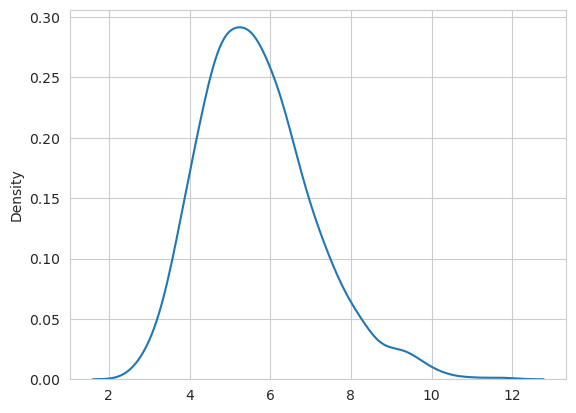

In [106]:
sns.kdeplot(kls)